I achieved the highest accuracy from the model defined under the heading
"Adding dropouts and removing data augmentation (BEST MODEL TILL NOW)".
In this notebook I trained several models using different hyper parameters. Other than that I learnt about performing image processing using Neural network and CNN both. From what I learnt during the experiment is:
1. Adding more layers increase the accuracy
2. Batch normalization and dropout prevented from overfitting
3. Neural network requires images to be flattened where as CNN dont

# Neural Network on MNIST

**Reading dataset**

In [81]:
#import mnist from keras datasets
from keras.datasets import mnist

#Load into variables
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Displaying the shapes
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


**Visualizing data**

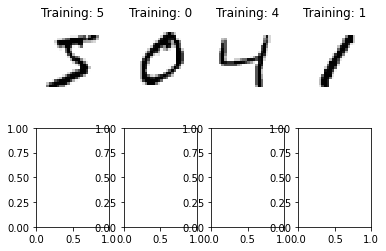

In [82]:
#Displaying 4 images from dataset
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(X_train, y_train))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

**Basic steps of building a neural network for image processing**
1. Flatten the input image dimensions to 1D (width pixels x height pixels)
2. Normalize the image pixel values (divide by 255)
3. One-Hot Encode the categorical column
4. Build a model architecture (Sequential) with Dense layers
5. Train the model and make predictions




**Preparing the data for the neural network**

In [83]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from keras.utils import np_utils


# Flattening the images from the 28x28 pixels to 1D 787 pixels
#Both the following methods can be used for flattening
#Method 1)
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0], -1)
#Method 2)
# X_train = X_train.reshape(60000, 784)
# X_test = X_test.reshape(10000, 784)

print(X_train.shape)
print(X_test.shape)

#Ensuring the type to be float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
#dividing by max value i.e. 255 because of the rgb channel
X_train /= 255
X_test /= 255

#classes = 10 because of 10 digits
n_classes = 10

print("Shape before one-hot encoding: ", y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", y_train.shape)


(60000, 784)
(10000, 784)
Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


**Defining the model**

In [0]:
model = Sequential()
# hidden layer 1
model.add(Dense(100, input_shape=(X_train.shape[1],), activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
"""
Loss = categorical_crossentropy because of the multi-class classification problem
optimizer = adam because of its self adjusting of learning rate nature
metrics = accuracy to evaluate the model
"""

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


Print the summary

In [85]:
# looking at the model summary
model.summary()



Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_42 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


Training the neural net

In [86]:
# training the model for 10 epochs and recording the training history
# the validation data is taken from the test set, which in real life is not possible
history=model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.3866 - accuracy: 0.8929 - val_loss: 0.2108 - val_accuracy: 0.9382
Epoch 2/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.1823 - accuracy: 0.9479 - val_loss: 0.1483 - val_accuracy: 0.9572
Epoch 3/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.1327 - accuracy: 0.9620 - val_loss: 0.1207 - val_accuracy: 0.9649
Epoch 4/10
60000/60000 [==============================] - 1s 25us/step - loss: 0.1045 - accuracy: 0.9692 - val_loss: 0.1084 - val_accuracy: 0.9675
Epoch 5/10
60000/60000 [==============================] - 1s 25us/step - loss: 0.0857 - accuracy: 0.9753 - val_loss: 0.0972 - val_accuracy: 0.9714
Epoch 6/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.0726 - accuracy: 0.9789 - val_loss: 0.0928 - val_accuracy: 0.9727
Epoch 7/10
60000/60000 [==============================] - 2s 26us/st

In [87]:
#increasing the batch size and changing the validation data to train set
history=model.fit(X_train, y_train, batch_size=256, epochs=10, validation_data=(X_train, y_train))
"""
It can be clearly seen that the accuracy has improved
"""

Train on 60000 samples, validate on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.0309 - accuracy: 0.9923 - val_loss: 0.0257 - val_accuracy: 0.9944
Epoch 2/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.0282 - accuracy: 0.9930 - val_loss: 0.0235 - val_accuracy: 0.9952
Epoch 3/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.0258 - accuracy: 0.9939 - val_loss: 0.0233 - val_accuracy: 0.9946
Epoch 4/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.0241 - accuracy: 0.9945 - val_loss: 0.0203 - val_accuracy: 0.9959
Epoch 5/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.0218 - accuracy: 0.9952 - val_loss: 0.0189 - val_accuracy: 0.9968
Epoch 6/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.0204 - accuracy: 0.9956 - val_loss: 0.0166 - val_accuracy: 0.9975
Epoch 7/10
60000/60000 [==============================] - 1s 21us/st

'\nIt can be clearly seen that the accuracy has improved\n'

**Plotting the accuracy and loss**

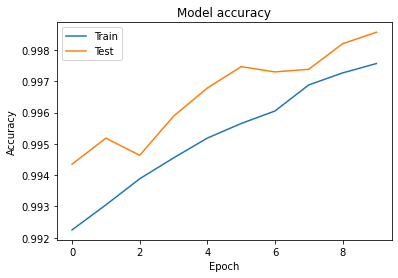

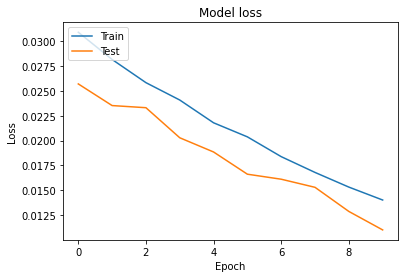

In [88]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Convolutional Neural network on MNIST

**Basic steps of building a convolutional neural network for image processing**
1. Reshape the input image dimensions to appropriate dimensions
2. Normalize the image pixel values (divide by 255)
3. One-Hot Encode the categorical column
4. Build a model architecture (Sequential) with Dense layers
5. Train the model and make predictions




**Preparing the data**

In [89]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from sklearn.metrics import accuracy_score

# loading the dataset again
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#reshaping the data to have a single color channel
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#converting to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data 
X_train /= 255
X_test /= 255

# one-hot encoding using keras
"""
now each label is replace by 10 columns
"""
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)


Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [90]:
print(X_train.shape[1:])

(28, 28, 1)


**Defining the CNN**

In [0]:
model = Sequential()

# convolutional layer
# model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPool2D(pool_size=(1,1)))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(100, activation='relu'))

# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


In [92]:
model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 26, 26, 25)        250       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 26, 26, 25)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 16900)             0         
_________________________________________________________________
dense_43 (Dense)             (None, 100)               1690100   
_________________________________________________________________
dense_44 (Dense)             (None, 10)                1010      
Total params: 1,691,360
Trainable params: 1,691,360
Non-trainable params: 0
_________________________________________________________________


In [93]:
# training the model for 10 epochs
history=model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.1986 - accuracy: 0.9419 - val_loss: 0.0836 - val_accuracy: 0.9735
Epoch 2/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.0590 - accuracy: 0.9827 - val_loss: 0.0608 - val_accuracy: 0.9797
Epoch 3/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.0364 - accuracy: 0.9889 - val_loss: 0.0541 - val_accuracy: 0.9814
Epoch 4/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.0232 - accuracy: 0.9926 - val_loss: 0.0608 - val_accuracy: 0.9822
Epoch 5/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.0148 - accuracy: 0.9959 - val_loss: 0.0570 - val_accuracy: 0.9825
Epoch 6/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.0089 - accuracy: 0.9977 - val_loss: 0.0546 - val_accuracy: 0.9838
Epoch 7/10
60000/60000 [==============================] - 3s 42us/st

In [94]:
#Increasing the batch size and changing the validation set
# training the model for 10 epochs
history=model.fit(X_train, y_train, batch_size=256, epochs=10, validation_data=(X_train, y_train))

Train on 60000 samples, validate on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 4.5504e-04 - val_accuracy: 1.0000
Epoch 2/10
60000/60000 [==============================] - 2s 39us/step - loss: 3.1644e-04 - accuracy: 1.0000 - val_loss: 2.0600e-04 - val_accuracy: 1.0000
Epoch 3/10
60000/60000 [==============================] - 2s 38us/step - loss: 1.9237e-04 - accuracy: 1.0000 - val_loss: 1.5628e-04 - val_accuracy: 1.0000
Epoch 4/10
60000/60000 [==============================] - 2s 38us/step - loss: 1.5379e-04 - accuracy: 1.0000 - val_loss: 1.2720e-04 - val_accuracy: 1.0000
Epoch 5/10
60000/60000 [==============================] - 2s 39us/step - loss: 1.2774e-04 - accuracy: 1.0000 - val_loss: 1.0757e-04 - val_accuracy: 1.0000
Epoch 6/10
60000/60000 [==============================] - 2s 39us/step - loss: 1.0771e-04 - accuracy: 1.0000 - val_loss: 9.3332e-05 - val_accuracy: 1.0000
Epoch 7/10
60000/60000 [

Plotting training and loss

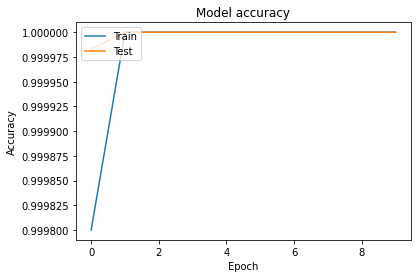

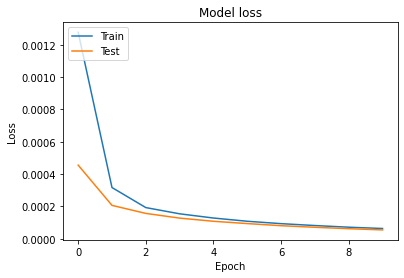

In [95]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [96]:
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 98.620


## Introducing batch normalization on normalized data**

In [97]:
from keras.layers import  BatchNormalization
model = Sequential()

# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=X_train.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(1,1)))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(100, activation='relu'))

# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

#Training
model.fit(X_train, y_train, batch_size=256, epochs=10, validation_data=(X_train, y_train))

#Evaluation
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('\n\n\n***************************************************\nAccuracy:%.3f' % (acc * 100.0))


Train on 60000 samples, validate on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.1798 - accuracy: 0.9468 - val_loss: 0.9077 - val_accuracy: 0.9591
Epoch 2/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0378 - accuracy: 0.9884 - val_loss: 0.1091 - val_accuracy: 0.9928
Epoch 3/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0149 - accuracy: 0.9956 - val_loss: 0.0101 - val_accuracy: 0.9979
Epoch 4/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0070 - accuracy: 0.9979 - val_loss: 0.0032 - val_accuracy: 0.9993
Epoch 5/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0040 - accuracy: 0.9990 - val_loss: 0.0031 - val_accuracy: 0.9992
Epoch 6/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0058 - accuracy: 0.9985 - val_loss: 0.0041 - val_accuracy: 0.9987
Epoch 7/10
60000/60000 [==============================] - 4s 63us/st

## Including batch norm on non normalized data

In [0]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from sklearn.metrics import accuracy_score

# loading the dataset again
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#reshaping the data to have a single color channel
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#converting to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# one-hot encoding using keras
"""
now each label is replace by 10 columns
"""
n_classes = 10
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)


In [99]:
from keras.layers import  BatchNormalization
model = Sequential()

# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=X_train.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(1,1)))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(100, activation='relu'))

# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

#Training
model.fit(X_train, y_train, batch_size=256, epochs=10, validation_data=(X_train, y_train))

#Evaluation
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('\n\n\n***************************************************\nAccuracy:%.3f' % (acc * 100.0))


Train on 60000 samples, validate on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.2943 - accuracy: 0.9272 - val_loss: 0.0546 - val_accuracy: 0.9838
Epoch 2/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0553 - accuracy: 0.9833 - val_loss: 0.0260 - val_accuracy: 0.9922
Epoch 3/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0245 - accuracy: 0.9922 - val_loss: 0.0141 - val_accuracy: 0.9961
Epoch 4/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0138 - accuracy: 0.9958 - val_loss: 0.0118 - val_accuracy: 0.9961
Epoch 5/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0083 - accuracy: 0.9976 - val_loss: 0.0063 - val_accuracy: 0.9981
Epoch 6/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0054 - accuracy: 0.9984 - val_loss: 0.0034 - val_accuracy: 0.9990
Epoch 7/10
60000/60000 [==============================] - 4s 63us/st

There is not much difference by including batch normalization on normal data vs normalized data. Hence we can use batch normalization in place of normalizing the data

## Building a deeper CNN

### Adding data augmentation

In [100]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import  BatchNormalization
model = Sequential()

# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(100, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))

model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(1,1)))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(100, activation='relu'))

# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

batch_size=256
#datagen.fit(X_train)
X = datagen.flow(X_train, y_train, batch_size=256)
test = datagen.flow(X_test, y_test, batch_size=256)

history = model.fit_generator(X, 
                              epochs = 10, 
                              steps_per_epoch = X_train.shape[0] // batch_size,
                              validation_data = test,
                              validation_steps = X_test.shape[0] // batch_size)

#Evaluation
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('\n\n\n***************************************************\nAccuracy:%.3f' % (acc * 100.0))


Epoch 1/10
234/234 [==============================] - 19s 80ms/step - loss: 0.4538 - accuracy: 0.8890 - val_loss: 0.2481 - val_accuracy: 0.9512
Epoch 2/10
234/234 [==============================] - 18s 76ms/step - loss: 0.1206 - accuracy: 0.9637 - val_loss: 0.0683 - val_accuracy: 0.9690
Epoch 3/10
234/234 [==============================] - 18s 77ms/step - loss: 0.0937 - accuracy: 0.9721 - val_loss: 0.1242 - val_accuracy: 0.9652
Epoch 4/10
234/234 [==============================] - 18s 76ms/step - loss: 0.0817 - accuracy: 0.9756 - val_loss: 0.1023 - val_accuracy: 0.9751
Epoch 5/10
234/234 [==============================] - 18s 76ms/step - loss: 0.0667 - accuracy: 0.9803 - val_loss: 0.0449 - val_accuracy: 0.9788
Epoch 6/10
234/234 [==============================] - 19s 79ms/step - loss: 0.0599 - accuracy: 0.9829 - val_loss: 0.0428 - val_accuracy: 0.9763
Epoch 7/10
234/234 [==============================] - 19s 79ms/step - loss: 0.0591 - accuracy: 0.9824 - val_loss: 0.0637 - val_accuracy:

### Increasing the layers

In [102]:
model=Sequential()
  
model.add(Conv2D(64, (3,3), activation="relu", input_shape=X_train.shape[1:]))
model.add(Conv2D(64, (3,3), activation="relu"))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(128,  (3,3), activation="relu"))
model.add(Conv2D(128, (3,3), activation="relu"))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())    
model.add(Conv2D(256, (3,3), activation="relu"))
    
model.add(MaxPool2D(pool_size=(2,2)))
    
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(10,activation="softmax"))
    
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


history = model.fit_generator(X, 
                              epochs = 10, 
                              steps_per_epoch = X_train.shape[0] // batch_size,
                              validation_data = test,
                              validation_steps = X_test.shape[0] // batch_size)

#Evaluation
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('\n\n\n***************************************************\nAccuracy:%.3f' % (acc * 100.0))

Epoch 1/10
234/234 [==============================] - 18s 77ms/step - loss: 0.1290 - accuracy: 0.9597 - val_loss: 0.1732 - val_accuracy: 0.9677
Epoch 2/10
234/234 [==============================] - 18s 76ms/step - loss: 0.0489 - accuracy: 0.9848 - val_loss: 0.0478 - val_accuracy: 0.9831
Epoch 3/10
234/234 [==============================] - 18s 76ms/step - loss: 0.0392 - accuracy: 0.9877 - val_loss: 0.0661 - val_accuracy: 0.9845
Epoch 4/10
234/234 [==============================] - 18s 77ms/step - loss: 0.0320 - accuracy: 0.9899 - val_loss: 0.0505 - val_accuracy: 0.9868
Epoch 5/10
234/234 [==============================] - 18s 77ms/step - loss: 0.0300 - accuracy: 0.9910 - val_loss: 0.0690 - val_accuracy: 0.9859
Epoch 6/10
234/234 [==============================] - 18s 77ms/step - loss: 0.0244 - accuracy: 0.9922 - val_loss: 0.0392 - val_accuracy: 0.9867
Epoch 7/10
234/234 [==============================] - 18s 76ms/step - loss: 0.0250 - accuracy: 0.9924 - val_loss: 0.1213 - val_accuracy:

It can be clearly seen that the testing accuracy increased by adding more layers which means the model has not overfitted to the data. Previously we did attain a training accuracy of 1 but not a good testing accuracy pointing towards overfitting of the model but adding more layers overcame that problem.

**Adding dropouts and removing data augmentation (BEST MODEL TILL NOW)**

Reading data

In [0]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from sklearn.metrics import accuracy_score

# loading the dataset again
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#reshaping the data to have a single color channel
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#converting to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# one-hot encoding using keras
"""
now each label is replace by 10 columns
"""
n_classes = 10
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)


In [108]:
model=Sequential()
  
model.add(Conv2D(64, (3,3), activation="relu", input_shape=X_train.shape[1:]))
model.add(Conv2D(64, (3,3), activation="relu"))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(128,  (3,3), activation="relu"))
model.add(Conv2D(128, (3,3), activation="relu"))
model.add(Dropout(0.4))#Dropout added in the same model architecture

model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())    
model.add(Conv2D(256, (3,3), activation="relu"))
    
model.add(MaxPool2D(pool_size=(2,2)))
    
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(10,activation="softmax"))
    
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


#Training
model.fit(X_train, y_train, batch_size=256, epochs=10, validation_data=(X_train, y_train))


#Evaluation
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('\n\n\n***************************************************\nAccuracy:%.3f' % (acc * 100.0))

Train on 60000 samples, validate on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.0970 - accuracy: 0.9705 - val_loss: 0.0304 - val_accuracy: 0.9904
Epoch 2/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.0325 - accuracy: 0.9902 - val_loss: 0.0391 - val_accuracy: 0.9878
Epoch 3/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.0232 - accuracy: 0.9925 - val_loss: 0.0515 - val_accuracy: 0.9833
Epoch 4/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.0189 - accuracy: 0.9939 - val_loss: 0.0263 - val_accuracy: 0.9911
Epoch 5/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.0156 - accuracy: 0.9951 - val_loss: 0.0141 - val_accuracy: 0.9956
Epoch 6/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.0134 - accuracy: 0.9960 - val_loss: 0.0474 - val_accuracy: 0.9827
Epoch 7/10
60000/60000 [==============================] - 9s 

The best accuracy achieved till now

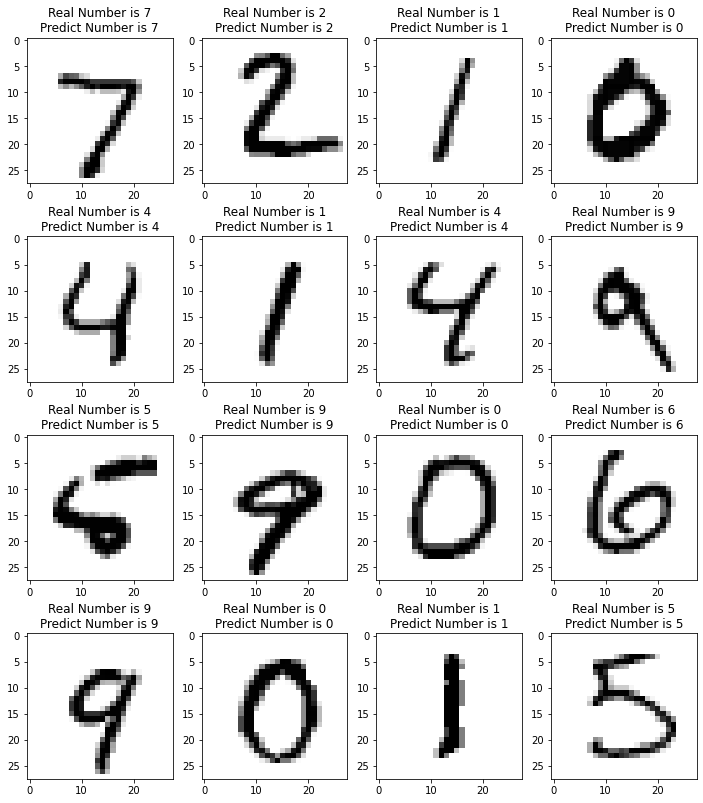

In [109]:
#Displaying the predictions
y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");